Random Forest - RMSE: 130.91, R^2: -0.24
SVM - RMSE: 118.21, R^2: -0.01


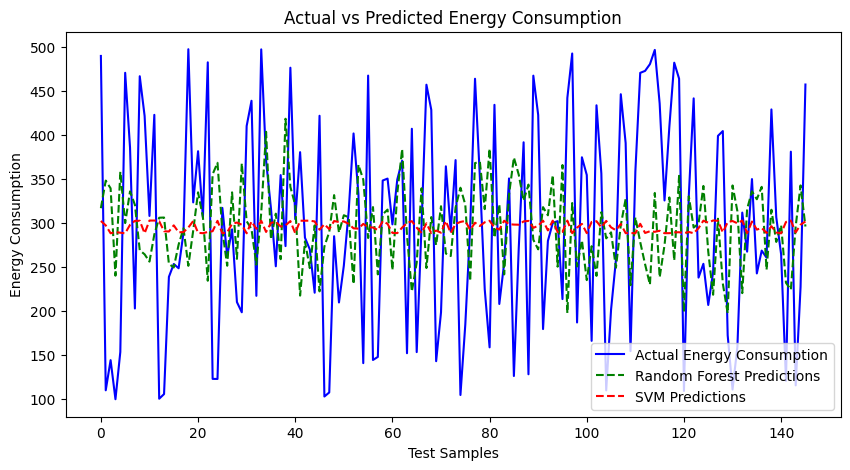

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Generate Sample Dataset
np.random.seed(42)
date_range = pd.date_range(start="2022-01-01", periods=730, freq='D')
data = pd.DataFrame({
    "date": date_range,
    "occupancy": np.random.randint(50, 500, size=730),
    "temperature": np.random.uniform(15, 35, size=730),
    "humidity": np.random.uniform(30, 80, size=730),
    "weather_conditions": np.random.choice(["Sunny", "Cloudy", "Rainy", "Stormy"], size=730),
    "energy_consumption": np.random.uniform(100, 500, size=730)
})

# Save sample dataset to CSV
data.to_csv("/content/building_energy_data.csv", index=False)

# Load Dataset
data = pd.read_csv("/content/building_energy_data.csv")

# Feature Selection
features = ["occupancy", "temperature", "humidity"]  # Adjust based on dataset
X = data[features]
y = data["energy_consumption"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Train Support Vector Machine Model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, R^2: {r2:.2f}")

evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, svm_pred, "SVM")

# Plot Graphs
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Energy Consumption', color='blue')
plt.plot(rf_pred, label='Random Forest Predictions', color='green', linestyle='dashed')
plt.plot(svm_pred, label='SVM Predictions', color='red', linestyle='dashed')
plt.xlabel("Test Samples")
plt.ylabel("Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption")
plt.legend()
plt.show()
